In [1]:
import glob
import shutil
import cv2 
from PIL import Image
import PIL
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random 
from sklearn.model_selection import train_test_split

import warnings
# Ignore waring
warnings.filterwarnings('ignore')


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
emotion_path = ['/angry/*', '/disgust/*', '/fear/*', '/happy/*', '/sad/*', '/surprise/*', '/neutral/*']


In [4]:
 train_path = '/content/drive/MyDrive/Dataset/emotions/train'


In [5]:
X_train = []
y_train = []
for i, path in enumerate(emotion_path):
  for name in glob.glob(train_path+path):
    img = cv2.imread(name)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (48,48))
    X.append((img))
    y.append(i)
len(X)


28821

In [6]:
X = np.array(X)
y = np.array(y)

Chia dữ liệu thành train và test

In [7]:
(X_train,X_test,y_train,y_test) = train_test_split(X,y,test_size=0.2,random_state=100)

Normalize Input

Normalize output

In [8]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(y_train.reshape(-1,1))
y_train = encoder.transform(y_train.reshape(-1,1)).toarray()
y_test = encoder.transform(y_test.reshape(-1,1)).toarray()

In [9]:
y_train[1]

array([0., 0., 0., 0., 1., 0., 0.])

In [10]:
print(X_train.shape)

(23056, 48, 48)


In [11]:
X_train = X_train /255
X_test_scaled = X_test / 255

Build Model

In [14]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from keras import regularizers

import cv2


In [51]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 conv2d_41 (Conv2D)          (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization_40 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_40 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_42 (Conv2D)          (None, 24, 24, 128)      

In [52]:
learning_rate = 0.0001  # Tốc độ học ban đầu

# Khởi tạo learning rate scheduler
optimizer1 = tf.keras.optimizers.Adam(learning_rate = 0.0001)

model.compile(optimizer = optimizer1, loss = 'categorical_crossentropy',metrics =['accuracy'])

history = model.fit(X_train, y_train,
          epochs=40,validation_data=(X_test_scaled, y_test),batch_size = 64,shuffle = True)

Epoch 1/40
361/361 [==============================] - 20s 41ms/step - loss: 9.3022 - accuracy: 0.2065 - val_loss: 9.0414 - val_accuracy: 0.1780
Epoch 2/40
361/361 [==============================] - 15s 42ms/step - loss: 8.2840 - accuracy: 0.2702 - val_loss: 7.7971 - val_accuracy: 0.3016
Epoch 3/40
361/361 [==============================] - 14s 40ms/step - loss: 7.3336 - accuracy: 0.3146 - val_loss: 6.8135 - val_accuracy: 0.3478
Epoch 4/40
361/361 [==============================] - 15s 41ms/step - loss: 6.4205 - accuracy: 0.3526 - val_loss: 5.9096 - val_accuracy: 0.3913
Epoch 5/40
361/361 [==============================] - 15s 41ms/step - loss: 5.5986 - accuracy: 0.3832 - val_loss: 5.1304 - val_accuracy: 0.4161
Epoch 6/40
361/361 [==============================] - 15s 41ms/step - loss: 4.8710 - accuracy: 0.4107 - val_loss: 4.7552 - val_accuracy: 0.3997
Epoch 7/40
361/361 [==============================] - 15s 41ms/step - loss: 4.2384 - accuracy: 0.4404 - val_loss: 3.8691 - val_accuracy:

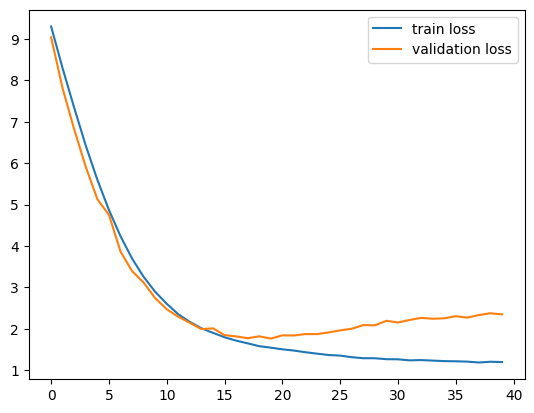

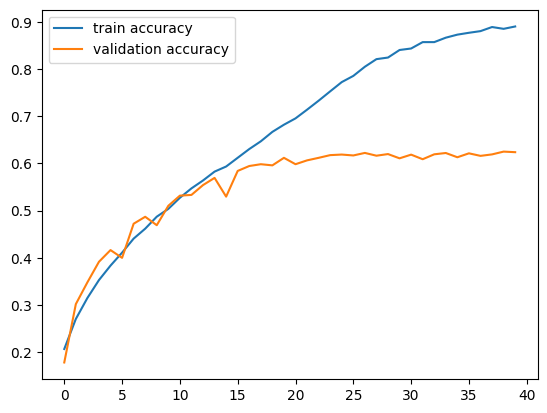

In [55]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

#plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [56]:
model.save('model_emotions_final.h5')

In [57]:
from tensorflow.keras.models import load_model
model1 = load_model('model_emotions_final.h5')

In [58]:
train_loss, train_acc = model1.evaluate(X_train, y_train)
test_loss, test_acc   = model1.evaluate(X_test_scaled, y_test)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

181/181 [==============================] - 1s 6ms/step - loss: 2.3508 - accuracy: 0.6236
final train accuracy = 98.84 , validation accuracy = 62.36


In [59]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_hat = model1.predict(X_test)
y_test1 =np.argmax(y_test,axis =1)
y_hat1 = np.argmax(y_hat,axis =1)
print(classification_report(y_test1, y_hat1))

181/181 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.33      0.50      0.40       814
           1       0.03      0.52      0.05        71
           2       0.30      0.33      0.31       820
           3       0.57      0.63      0.60      1436
           4       0.42      0.07      0.11       968
           5       0.78      0.15      0.25       630
           6       0.48      0.17      0.25      1026

    accuracy                           0.34      5765
   macro avg       0.42      0.34      0.28      5765
weighted avg       0.47      0.34      0.34      5765



[[405 175  80  86  33   0  35]
 [ 25  37   2   5   0   0   2]
 [163 217 272 116  13  12  27]
 [183 208 100 899  10   4  32]
 [199 257 193 166  63   5  85]
 [ 63 278  91  92   1  96   9]
 [178 252 181 202  30   6 177]]


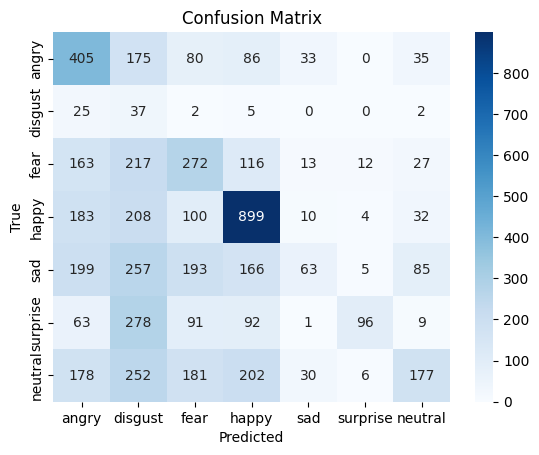

In [60]:
import seaborn as sns

cm = confusion_matrix(y_test1, y_hat1)
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Cấu hình trục x và trục y
tick_labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
plt.xticks(np.arange(len(tick_labels)) + 0.5, tick_labels)
plt.yticks(np.arange(len(tick_labels)) + 0.5, tick_labels)

# Đặt tên cho các trục
plt.xlabel('Predicted')
plt.ylabel('True')

# Hiển thị biểu đồ
plt.title('Confusion Matrix')
plt.show()